# Cognitive Age Prediction with Structural and Functional MRI

In [1]:
import pandas as pd
import numpy as np

from camcan.utils import (run_stacking, run_ridge, plot_pred, plot_learning_curve,
                          plot_barchart, StackingRegressor, plot_boxplot, plot_error_scatters)

%matplotlib inline

/home/okozyn/anaconda3/envs/mne/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
CV = 10
N_JOBS = 10
# store mae, std for the summary plot
anatomy_mae_std = {}
function_mae_std = {}
multimodal_mae_std = {}

anatomy_mae = {}
function_mae = {}
multimodal_mae = {}

anatomy_pred_diff = {}
function_pred_diff = {}
multimodal_pred_diff = {}

## Structural MRI

### Read Data

In [3]:
# read information about subjects
subjects_data = pd.read_csv('../../data/participant_data.csv', index_col=0)

subjects_data.head()

,age,hand,gender_text,gender_code,tiv_cubicmm,cbuid700,cbuid280_sess1,cbuid280_sess2,cbuid280_sess3,cbuid280_sess4,profilecode,profilecode_numeric
Observations,,,,,,,,,,,,
CC110033,24,90.0,MALE,1,1413746.0,CBU120746,NaN,NaN,NaN,NaN,NaN,NaN
CC110037,18,89.0,MALE,1,1386581.0,CBU110544,NaN,NaN,NaN,NaN,NaN,NaN
CC110045,24,100.0,FEMALE,2,1385355.0,CBU111116,NaN,NaN,NaN,NaN,NaN,NaN
CC110056,22,100.0,FEMALE,2,1286849.0,CBU110547,NaN,CBU140153,CBU140224,NaN,D,1.0
CC110062,20,58.0,MALE,1,1582719.0,CBU110468,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# read features

area_data = pd.read_hdf('../../data/structural/structural_data.h5', 
                           key='area')
thickness_data = pd.read_hdf('../../data/structural/structural_data.h5',
                               key='thickness')
volume_data = pd.read_hdf('../../data/structural/structural_data.h5',
                            key='volume')

volume_data.head()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,
CC310256,16443.3,215.0,14808.5,56803.4,7378.4,3956.5,5018.7,2464.6,1684.8,2822.3,...,1.194657e+06,1.160384e+06,1158424.0,1847752.0,0.718849,0.988205,16.0,7.0,23.0,1.869806e+06
CC110033,6018.2,145.2,13938.6,56055.7,8523.9,3604.6,4557.6,2008.8,971.2,1426.7,...,1.030259e+06,1.014403e+06,1011785.0,1596489.0,0.757157,1.029559,41.0,23.0,64.0,1.550654e+06
CC110037,5150.4,226.8,14923.5,59652.3,7732.1,3223.5,4647.4,2154.4,773.3,1478.8,...,1.032711e+06,1.022294e+06,1019858.0,1618468.0,0.782415,1.072228,19.0,30.0,49.0,1.509444e+06
CC110098,6299.5,269.5,14468.0,59900.4,7368.8,3976.3,5239.7,1884.4,880.3,1790.9,...,1.091133e+06,1.079604e+06,1076145.0,1732368.0,0.740368,1.031667,12.0,28.0,40.0,1.679193e+06
CC110126,2711.6,352.6,16216.5,57535.4,7946.3,3431.7,4875.8,1994.7,726.2,1233.2,...,1.094727e+06,1.088829e+06,1086463.0,1628306.0,0.769026,1.009764,21.0,23.0,44.0,1.612561e+06


In [ ]:
area_data = area_data.dropna()
thickness_data = thickness_data.dropna()
volume_data = volume_data.dropna()

### Training and Prediction

#### Area

MAE: 10.82
MAE STD: 0.64


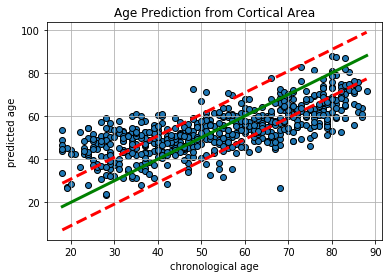

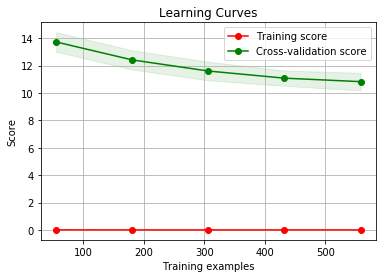

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ = \
    run_ridge(area_data, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

anatomy_mae['Cortical Surface Area'] = arr_mae
anatomy_mae_std['Cortical Surface Area'] = (mae, std)
anatomy_pred_diff['Cortical Surface Area'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Cortical Area')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Thickness

MAE: 7.37
MAE STD: 0.42


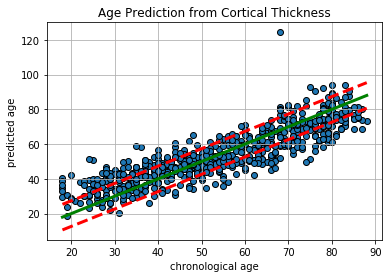

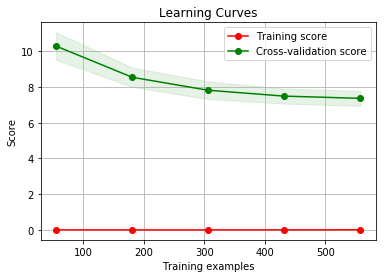

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(thickness_data, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

anatomy_mae['Cortical Thickness'] = arr_mae
anatomy_mae_std['Cortical Thickness'] = (mae, std)
anatomy_pred_diff['Cortical Thickness'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Cortical Thickness')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Volume

MAE: 6.79
MAE STD: 0.50


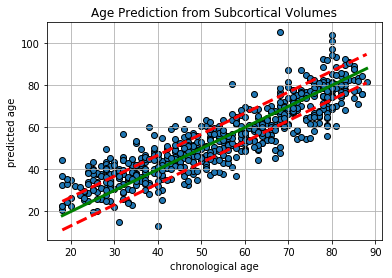

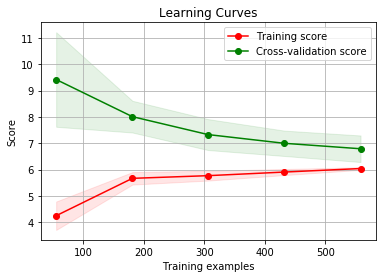

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, sbjs \
    = run_ridge(volume_data, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

anatomy_mae['Subcortical Volumes'] = arr_mae
anatomy_mae_std['Subcortical Volumes'] = (mae, std)
anatomy_pred_diff['Subcortical Volumes'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Subcortical Volumes')
plot_learning_curve(train_sizes, train_scores, test_scores)

## Functional MRI

### BASC 197

In [ ]:
# read connectivity data
connect_data_tangent_basc = pd.read_hdf('../../data/connectivity/connect_data_tangent.h5',
                              key='basc197')
connect_data_r2z_basc = pd.read_hdf('../../data/connectivity/connect_data_correlation.h5',
                              key='basc197')
connect_data_tangent_basc.head()

,0,1,2,3,4,5,6,7,8,9,...,19493,19494,19495,19496,19497,19498,19499,19500,19501,19502
CC110033,0.096697,-0.140008,0.067199,-0.013200,0.040234,-0.163020,-0.029214,0.156358,0.078821,0.087680,...,-0.037457,0.044814,0.021185,-0.036576,-0.054100,-0.002762,0.053630,0.022528,-0.006503,0.273724
CC110037,-0.591520,-0.088332,-0.723872,0.101235,-0.012502,-0.854274,0.029541,0.023450,-0.067513,-1.492769,...,-0.067943,-0.124460,-0.034104,-0.103519,0.098355,-0.021281,0.136260,-0.073003,0.048019,-0.070249
CC110045,-0.042581,-0.176352,-0.037048,0.141138,-0.055788,-0.007159,0.041272,0.144073,-0.075119,0.061303,...,0.037748,-0.021896,0.097779,0.053294,0.060940,-0.000433,-0.062330,-0.039093,0.033913,-0.148330
CC110069,-0.442311,-0.079525,-0.141859,0.023382,-0.061421,-0.358688,0.069646,-0.011345,0.072415,0.156324,...,0.035603,-0.036768,-0.023163,0.023483,-0.037131,-0.039623,-0.011263,0.056086,-0.144799,-0.178823
CC110087,-0.097007,-0.133572,0.074754,0.099027,-0.034863,-0.310058,0.031366,-0.022870,0.071330,-0.108389,...,-0.073019,-0.152082,0.123719,-0.041476,0.067740,0.094479,0.045866,0.040174,-0.045647,0.129202


#### Tangent Space

MAE: 5.95
MAE STD: 0.55


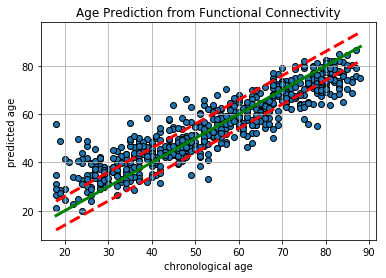

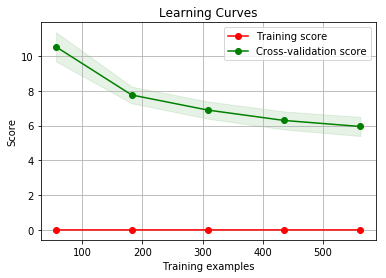

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_tangent_basc, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

function_mae_std['Connectivity Matrix, BASC 197 tan'] = (mae, std)
function_mae['Connectivity Matrix, BASC 197 tan'] = arr_mae
function_pred_diff['Connectivity Matrix, BASC 197 tan'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

#### Connectivity with Fisher's r-to-z Transform

MAE: 7.32
MAE STD: 0.63


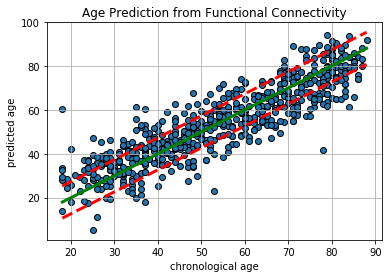

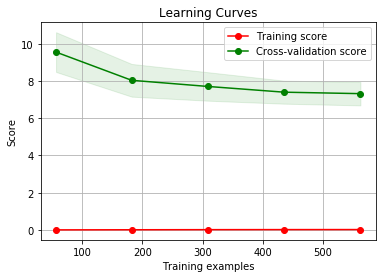

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_r2z_basc, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

function_mae_std['Connectivity Matrix, BASC 197 r2z'] = (mae, std)
function_mae['Connectivity Matrix, BASC 197 r2z'] = arr_mae
function_pred_diff['Connectivity Matrix, BASC 197 r2z'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

### MODL 256

In [ ]:
# read connectivity data
connect_data_tangent_modl = pd.read_hdf('../../data/connectivity/connect_data_tangent.h5',
                              key='modl256')
connect_data_r2z_modl = pd.read_hdf('../../data/connectivity/connect_data_correlation.h5',
                              key='modl256')
connect_data_tangent_modl.head()

,0,1,2,3,4,5,6,7,8,9,...,32886,32887,32888,32889,32890,32891,32892,32893,32894,32895
CC110033,0.074408,-0.018078,-0.026110,-0.035737,0.026987,-0.148206,-0.123741,0.043818,-0.007511,0.028245,...,0.033294,0.047502,0.026974,-0.018982,0.119100,0.139546,-0.001772,0.049109,0.009093,-0.208286
CC110037,-1.691638,-0.026637,-0.530353,0.047946,-0.010420,-1.973813,-0.068899,-0.057347,-0.048387,0.615105,...,-0.008444,-0.012884,0.050008,0.042905,0.058089,-0.024558,0.064888,-0.070759,0.024871,-1.646669
CC110045,0.129928,0.083970,-0.255726,-0.051040,0.090631,-0.166786,0.005209,0.121638,-0.003998,-0.167915,...,-0.010775,-0.043265,0.014613,-0.004538,-0.020235,0.050549,0.285926,-0.061542,0.206019,0.149908
CC110069,-0.155261,-0.004314,-0.298256,-0.103225,0.001456,-0.616323,-0.002113,0.057129,-0.043140,0.176846,...,-0.032800,0.072003,-0.247339,0.149980,-0.059462,-0.071107,-0.107166,0.025952,-0.043589,0.311891
CC110087,-0.304658,-0.012165,-0.093857,0.011350,0.101019,-0.086796,-0.099032,-0.083703,-0.038678,0.065644,...,0.035628,-0.133997,0.058017,-0.014234,-0.035109,-0.067293,-0.054121,-0.024550,-0.095122,-0.023328


#### Tangent Space

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_tangent_modl, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

function_mae_std['Connectivity Matrix, MODL 256 tan'] = (mae, std)
function_mae['Connectivity Matrix, MODL 256 tan'] = arr_mae
function_pred_diff['Connectivity Matrix, MODL 256 tan'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

/home/okozyn/anaconda3/envs/mne/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


#### Connectivity with Fisher's r-to-z Transform

In [ ]:
y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_ridge(connect_data_r2z_modl, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

function_mae_std['Connectivity Matrix, MODL 256 r2z'] = (mae, std)
function_mae['Connectivity Matrix, MODL 256 r2z'] = arr_mae
function_pred_diff['Connectivity Matrix, MODL 256 r2z'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction from Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

## Stacking

Parameters for stacking were taken from [Liem's paper](https://github.com/fliem/LeiCA_LIFE/blob/e9d02464a9e43b97cef9c7b753d88120cfbd6c94/learning/learning_stacking_utils.py#L30)

What to do:

1. Combine all the data into one big matrix, note the range of features in each vector
2. Create pipeline object for each classiffier, which should use unitary transform columns that only extracts required features
3. All these should be trained and evaluated. Use Guillaume's code for classifiers.

### Anatomy

In [ ]:
anatomy_data = [('area', area_data), ('thickness', thickness_data), ('volume', volume_data)]

y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_stacking(anatomy_data, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

anatomy_mae_std['Stacked-anatomy'] = (mae, std)
anatomy_mae['Stacked-anatomy'] = arr_mae
anatomy_pred_diff['Stacked-anatomy'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction, Stacked-anatomy')
plot_learning_curve(train_sizes, train_scores, test_scores)

### Connectivity

In [ ]:
connect_data_tanh = [('basc', connect_data_tangent_basc), ('modl', connect_data_tangent_modl)]

y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_stacking(connect_data_tanh, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

function_mae_std['Stacked-function'] = (mae, std)
function_mae['Stacked-function'] = arr_mae
function_pred_diff['Stacked-function'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction, Stacked Functional Connectivity')
plot_learning_curve(train_sizes, train_scores, test_scores)

### Multi-modal

In [ ]:
multimodal_data = [('area', area_data), ('thickness', thickness_data), ('volume', volume_data),
                   ('basc', connect_data_tangent_basc), ('modl', connect_data_tangent_modl)]

y, y_pred, arr_mae, arr_r2, train_sizes, train_scores, test_scores, _ \
    = run_stacking(multimodal_data, subjects_data, cv=CV, n_jobs=N_JOBS)

arr_mae = -arr_mae
mae = arr_mae.mean()
std = arr_mae.std()

print('MAE: %.2f' % mae)
print('MAE STD: %.2f' % std)

multimodal_mae_std['Stacked-multimodal'] = (mae, std)
multimodal_mae['Stacked-multimodal'] = arr_mae
multimodal_pred_diff['Stacked-multimodal'] = np.abs(y - y_pred)

plot_pred(y, y_pred, mae, title='Age Prediction, Stacked-multimodal')
plot_learning_curve(train_sizes, train_scores, test_scores)

## Summary

### Results from Liem2016

In [ ]:
anatomy_mae_std_liem = {'Cortical Thickness': (5.95, 4.69),
                        'Cortical Surface Area': (7.29, 5.96),
                        'Subcortical Volumes': (6.44, 5.02),
                        'Stacked-anatomy': (4.83, 4.01)}

connect_mae_std_liem = {'Connectivity Matrix 197': (5.99, 4.57),
                        'Connectivity Matrix 444': (5.77, 4.42),
                        'Stacked-function': (5.25, 4.4)}

multimodal_mae_std_liem = {'Stacked-Multimodal': (4.29, 3.49)}

plot_barchart(anatomy_mae_std_liem, title='Age Prediction, Anatomy', bar_text_indent=1)
plot_barchart(connect_mae_std_liem, title='Age Prediction, Function', bar_text_indent=1)
plot_barchart(multimodal_mae_std_liem, title='Age Prediction, Multimodal', bar_text_indent=1)

### Results for CamCAN

In [ ]:
plot_barchart(anatomy_mae_std, title='Age Prediction, Anatomy', bar_text_indent=1)
plot_barchart(function_mae_std, title='Age Prediction, Function', bar_text_indent=1)
plot_barchart(multimodal_mae_std, title='Age Prediction, Multimodal', bar_text_indent=1)

In [ ]:
plot_boxplot(anatomy_mae, title='Age Prediction, Anatomy')
plot_boxplot(function_mae, title='Age Prediction, Function')
plot_boxplot(multimodal_mae, title='Age Prediction, Multimodal')

In [ ]:
plot_error_scatters(anatomy_pred_diff)
plot_error_scatters(function_pred_diff)
plot_error_scatters(multimodal_pred_diff)